In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tlk

In [2]:
df = pd.read_csv('data/Churn_Modelling.csv')
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


### Univariate Analysis

In [4]:
new_df = df[['Geography', 'Gender', 'Exited']]
new_df.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [10]:
new_df.Exited.value_counts() / len(new_df) * 100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

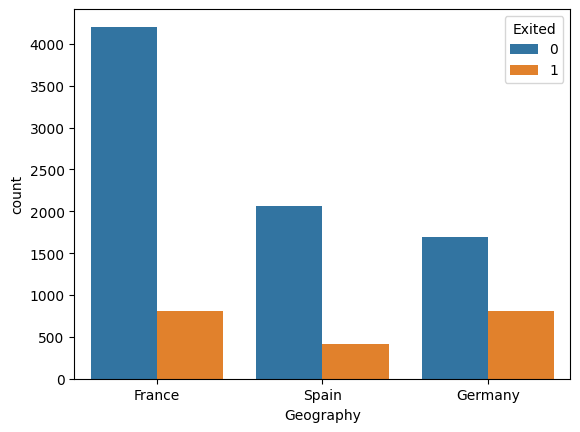

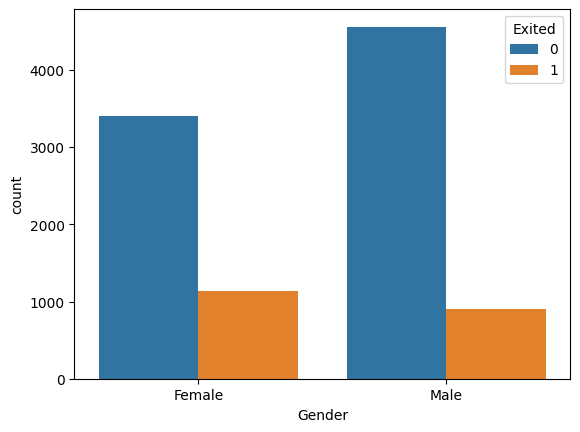

In [8]:
for i, preditor in enumerate(new_df.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=new_df, x=preditor, hue='Exited')

### Bivariate Analysis

<Axes: xlabel='Gender', ylabel='Count'>

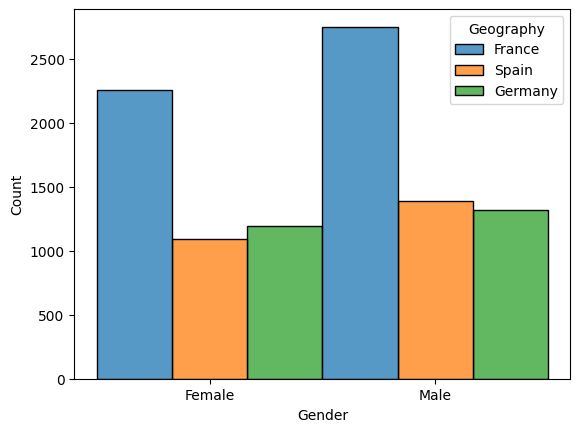

In [13]:
sns.histplot(x='Gender', hue=df['Geography'], data=new_df, multiple="dodge")

In [14]:
new_df1 = new_df.loc[new_df['Exited']==1]

<Axes: xlabel='Gender', ylabel='Count'>

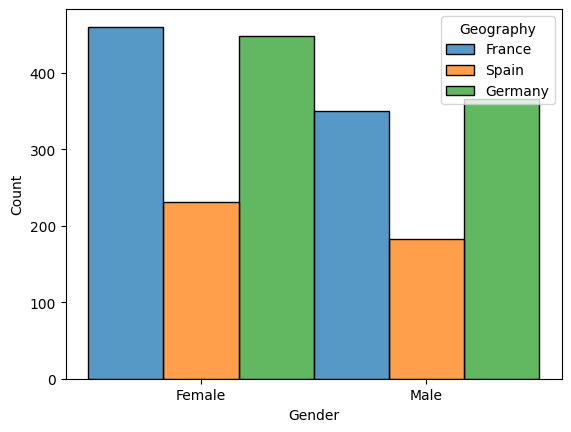

In [15]:
sns.histplot(x='Gender', hue=df['Geography'], data=new_df1, multiple='dodge')

### Numrical Analysis

<Axes: >

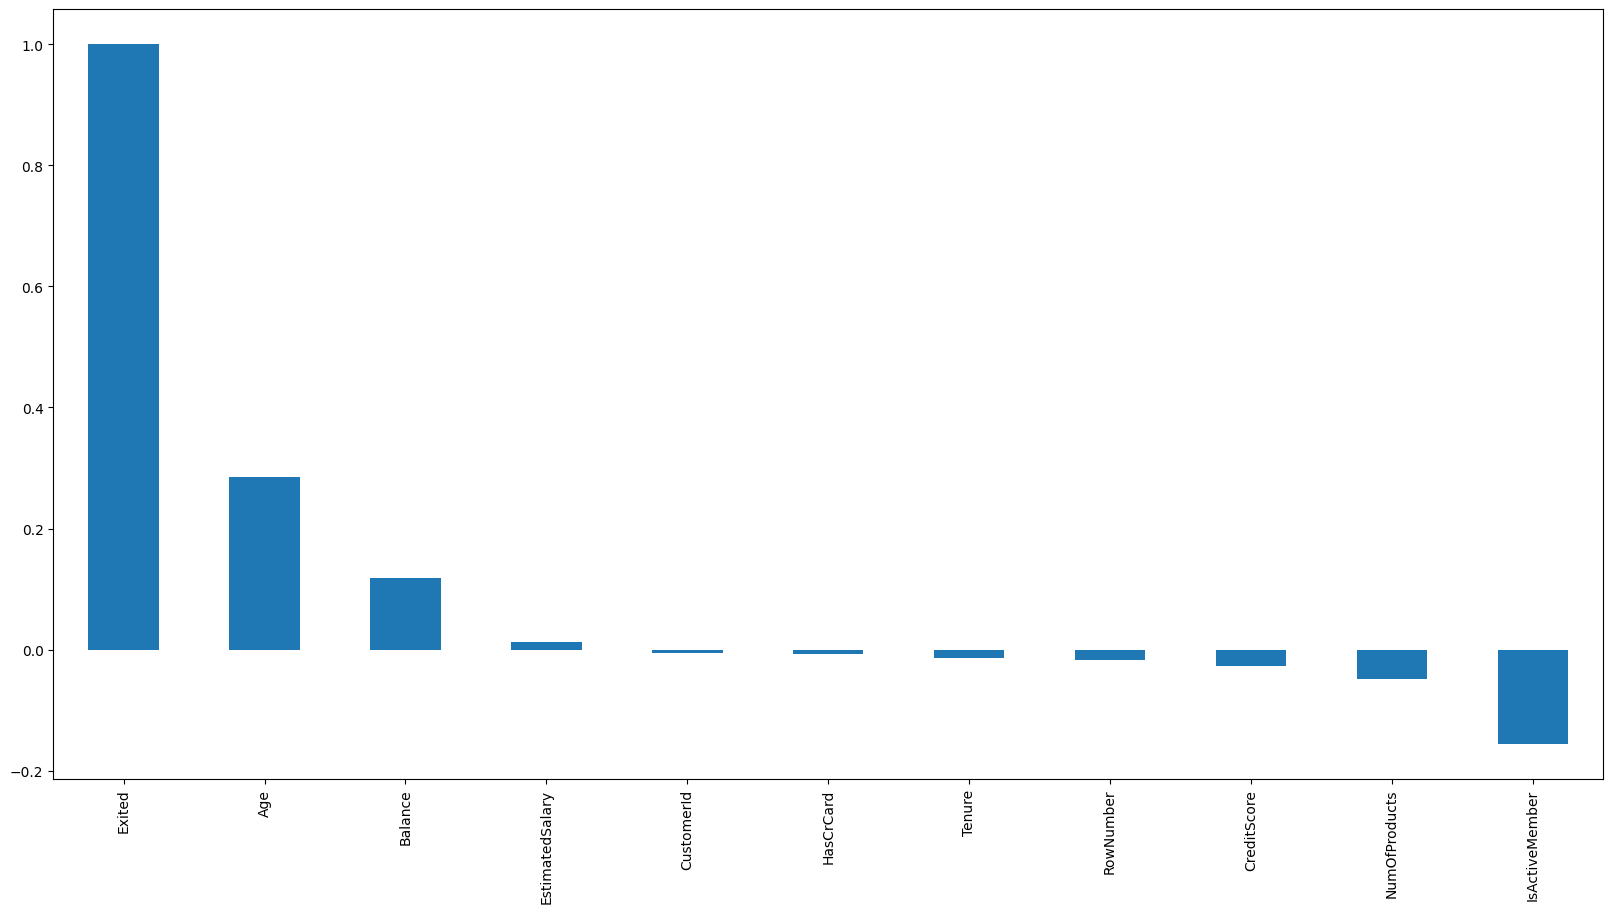

In [18]:
plt.figure(figsize=(20,10))
df.corr(numeric_only=True)['Exited'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

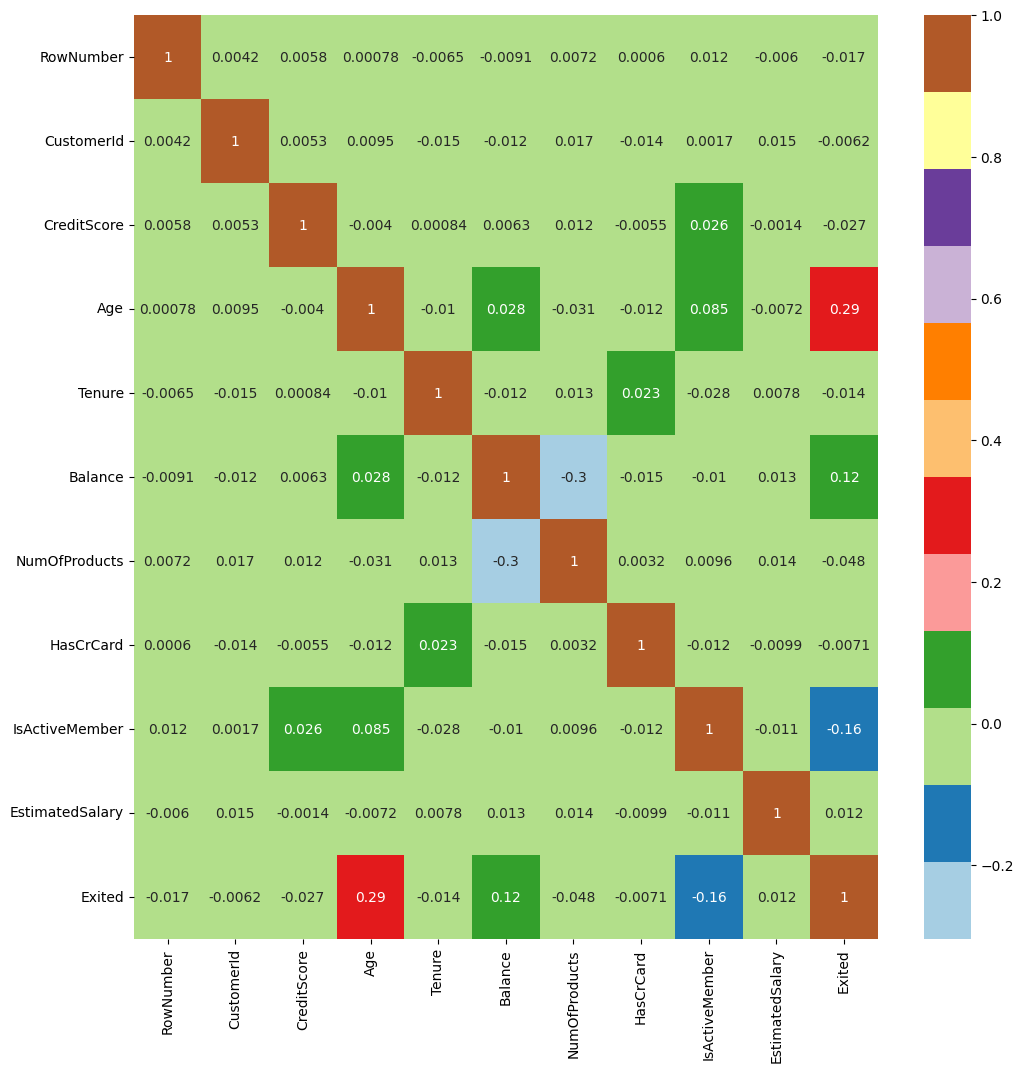

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Paired')

<Axes: xlabel='Age'>

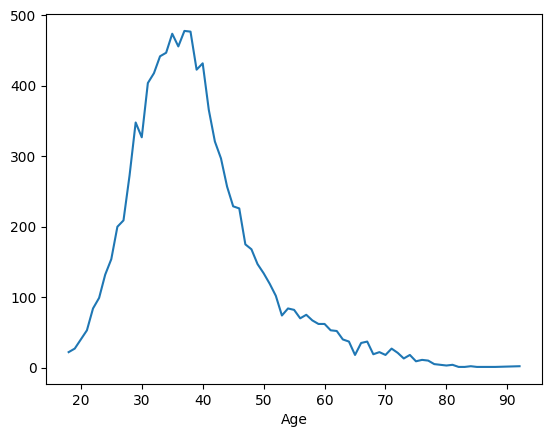

In [30]:
df['Age'].value_counts().sort_index(ascending=True).plot()

In [31]:
df['Age'].skew()

np.float64(1.0113202630234552)

In [32]:
new_df2 = df.loc[df['Exited']==1]

<Axes: xlabel='Age'>

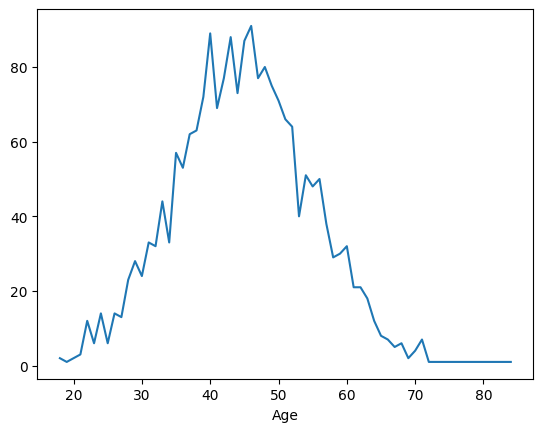

In [33]:
new_df2['Age'].value_counts().sort_index(ascending=True).plot()

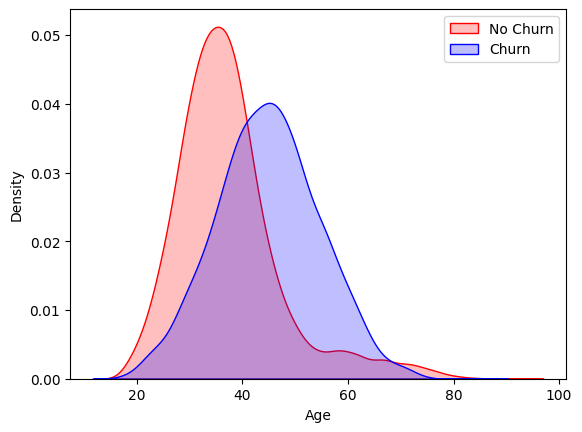

In [36]:
tot = sns.kdeplot(df.Age[(df['Exited'] == 0)], color="Red", fill=True)
tot = sns.kdeplot(df.Age[(df['Exited'] == 1)], color="Blue", fill=True)
tot.legend(['No Churn', 'Churn'])

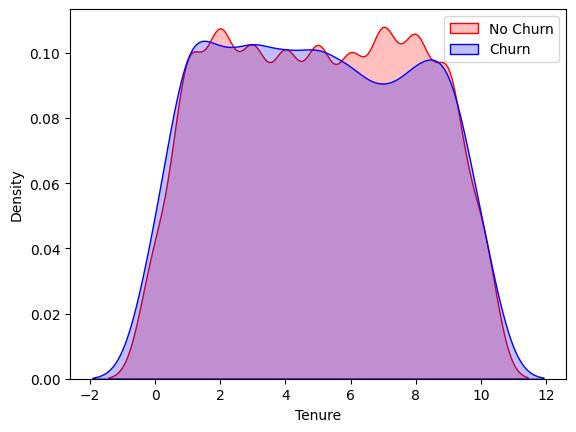

In [37]:
tot = sns.kdeplot(df.Tenure[(df['Exited'] == 0)], color="Red", fill=True)
tot = sns.kdeplot(df.Tenure[(df['Exited'] == 1)], color="Blue", fill=True)
tot.legend(['No Churn', 'Churn'])

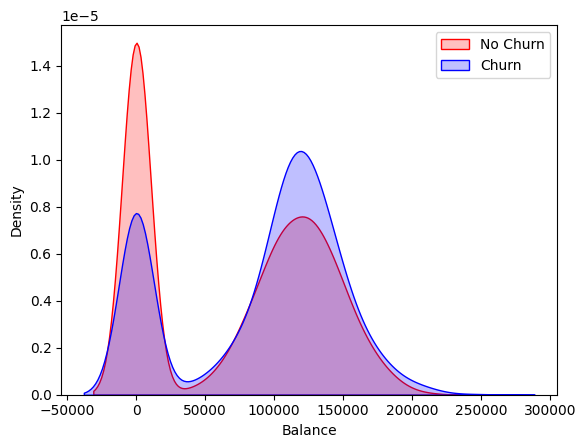

In [38]:
tot = sns.kdeplot(df.Balance[(df['Exited'] == 0)], color="Red", fill=True)
tot = sns.kdeplot(df.Balance[(df['Exited'] == 1)], color="Blue", fill=True)
tot.legend(['No Churn', 'Churn'])